## Imports Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

In [2]:
data = pd.read_csv('smoke_detection_iot.csv')

In [3]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


we can see in each column in our dataset it turns out that all the data is numeric

In [4]:
data.drop('Unnamed: 0',axis=1, inplace=True)

delete the Unnamed column because we already have an index on each row

In [5]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


we can see that we have removed the unnamed column from our dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


based on the information from our dataset, we can see there are 62630 rows and 15 columns and all column types are numeric

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04
PM2.5,62630.0,1.844678e+02,1976.305615,0.000000e+00,1.340000e+00,1.880000e+00,2.180000e+00,4.543226e+04


the following is the information for each value in all the columns of the datasets

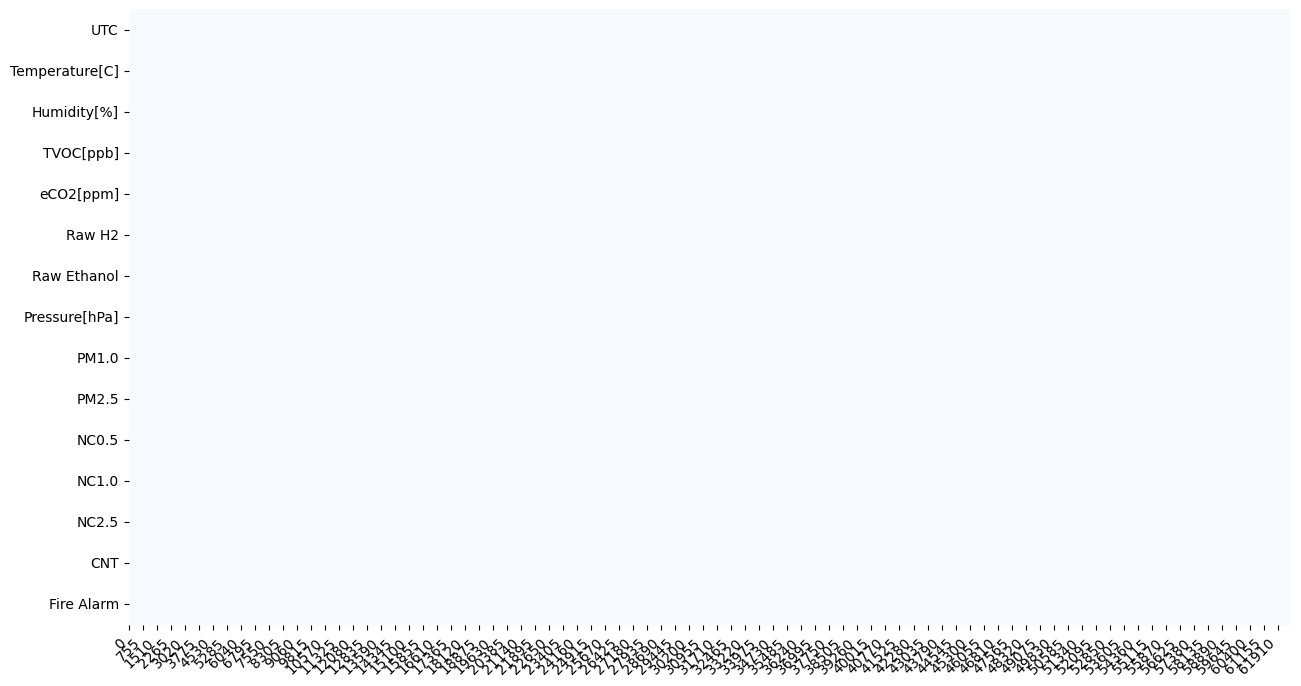

In [8]:
from jcopml.plot import plot_missing_value
plot_missing_value(data)

In the picture above we can see that there is no missing value from our datasets, it can be seen from the same white color in each column row

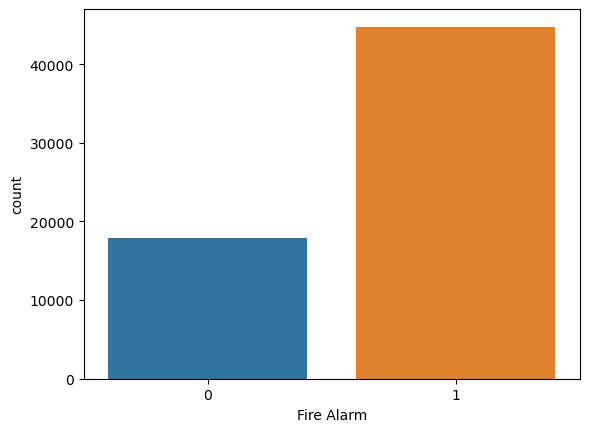

In [9]:
sns.countplot(data=data, x='Fire Alarm');

In the plot above we can see that the labels in our dataset are not very balanced where there are more labels 1 than labels 0

In [10]:
data['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

the number of labels 1 is 44757 samples and the number 0 is 17873 samples

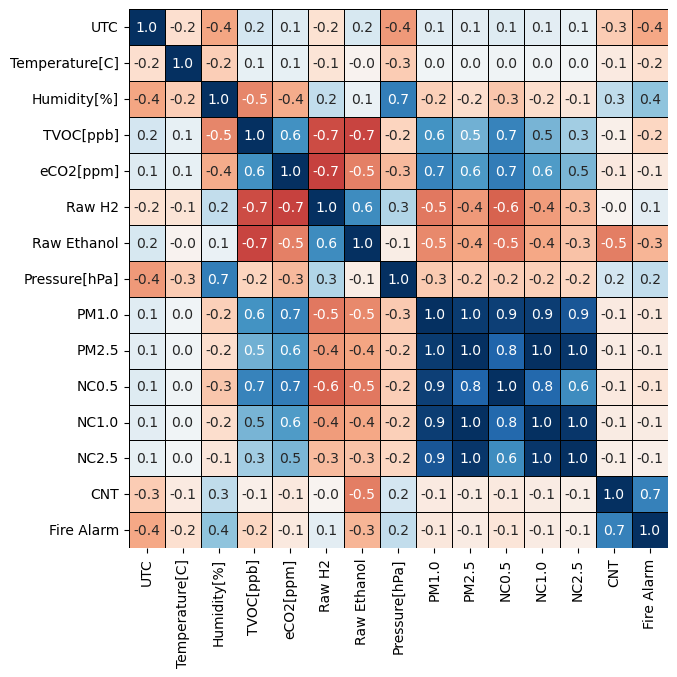

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='.1f', cmap='RdBu', 
            cbar=False, square=True, linecolor='black', vmin=-1, vmax=1);

the following is the correlation in each column of the dataset

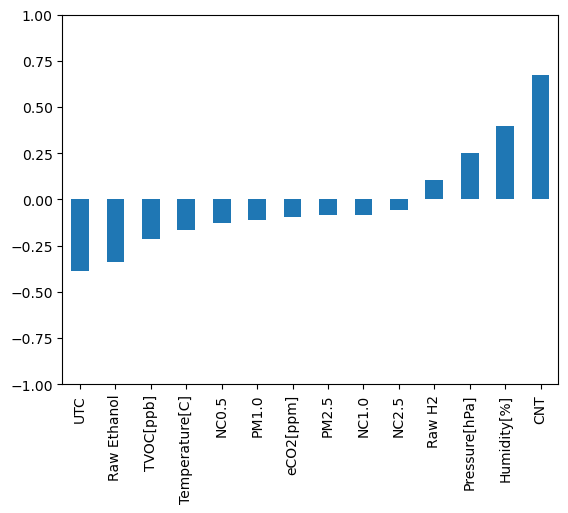

In [12]:
plt.ylim(-1,1)
data.corr()['Fire Alarm'][:-1].sort_values().plot(kind='bar');

the following is the correlation of each column with the labels in our dataset, where the CNT and Humidity columns are the columns with the highest correlation with our labels

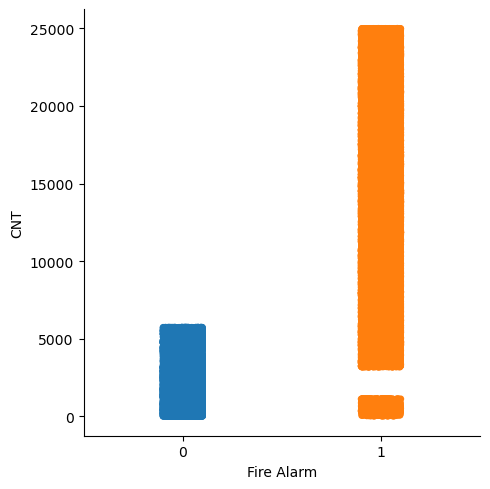

In [13]:
sns.catplot(data=data, x='Fire Alarm', y='CNT');

In the catplot image above we can see that each value in the CNT column associated with labels 0 and 1 turns out that each sample is very dense without any distance and label, 1 has a higher value than label 0, but in label 1 there is a certain value that is not in the column CNT so you can see the cut part at the bottom of label 1

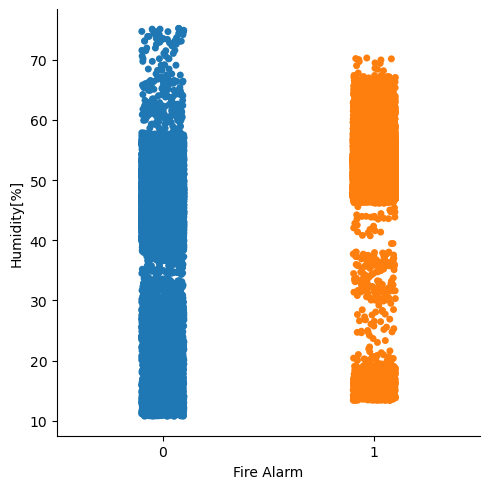

In [14]:
sns.catplot(data=data, x='Fire Alarm', y='Humidity[%]');

In the catplot image above we can see that each value in the Humidity column associated with labels 0 and 1 turns out that each sample is very dense and some are between values 20 to 45 in column 1, label 0 has a higher value than label 1

In [15]:
X = data.drop('Fire Alarm', axis=1)
y = data['Fire Alarm']

let's separate it for the feature column and a label column
where X is the feature column and y is the label column

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=77)

let's use 20% for our test data and use the stratify parameter for the label column so that the division of each label 0 and 1 is balanced

In [17]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('algo', RandomForestClassifier())
])

use a pipeline so that data leakage does not occur in our dataset and use a standard scaler for scaling numeric data on features, also add the model algorithm that we will use, in this case we use random forest

In [18]:
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('algo', RandomForestClassifier())])

In [19]:
print(f'score data train : {model.score(X_train,y_train)} | score data test : {model.score(X_test,y_test)}')

score data train : 1.0 | score data test : 0.9997604981638193


wow, the score for our train data is 100% and our test data is 99%, that's very good

Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



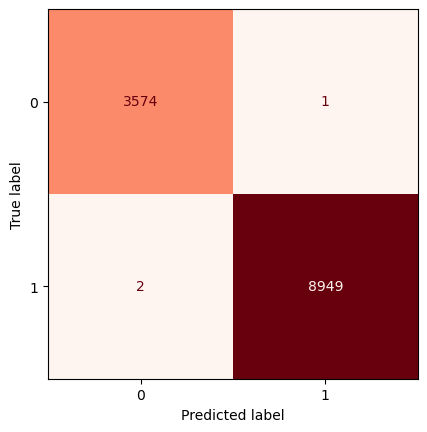

In [20]:
y_pred = model.predict(X_test)
print('Random Forest Classifier\n')
print(classification_report(y_test,y_pred))
plot_confusion_matrix(model, X_test, y_test, colorbar=False, cmap='Reds' );

in the results of our confusion matrix, we can see that the results are very good where we only guess wrong for 1 is 0 only 2 errors,